In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
fpath = "data/out0.csv"
df = pd.read_csv(fpath)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/out0.csv'

In [ ]:
atb1 = []
atb2 = []

for i in range(10):
    df_exp = df[i*10:(i+1)*10]
    atb1.append(df_exp["AVERAGE_TPS_BENCH1"].values)
    atb2.append(df_exp["AVERAGE_TPS_BENCH2"].values)
    

In [ ]:
atb1

[array([21.555958, 21.960638, 21.550198, 22.026299, 21.94686 , 21.57916 ,
        21.54888 , 21.849283, 21.796194, 18.885042]),
 array([22.306854, 21.522001, 21.535412, 21.613005, 21.599428, 22.011097,
        24.226652, 21.221056, 24.442917, 21.57201 ]),
 array([22.399927, 21.403025, 21.531393, 24.42514 , 21.93856 , 21.809546,
        24.44971 , 21.790442, 21.537453, 21.953497]),
 array([21.302696, 22.514935, 18.735264, 21.45026 , 24.306633, 21.882877,
        21.543364, 18.78833 , 21.550854, 22.023966]),
 array([21.942753, 21.55031 , 23.640314, 18.855865, 22.642954, 20.50273 ,
        20.327427, 21.551836, 21.266344, 21.221432]),
 array([21.512606, 19.987785, 23.950768, 18.997765, 18.297709, 21.54177 ,
        21.264732, 21.557545, 20.470163, 21.572916]),
 array([21.587059, 20.326763, 21.266212, 21.666159, 21.816376, 21.610771,
        21.62759 , 21.598507, 21.947441, 24.470932]),
 array([18.903582, 25.107891, 21.5449  , 21.568203, 20.916895, 20.483067,
        17.29926 , 21.831594, 

In [ ]:
from scipy.stats import ks_2samp, epps_singleton_2samp


ks_2samp_list = [ks_2samp(atb1[i], atb2[i]) for i in range(len(atb1))]
epps_2samp_list = [epps_singleton_2samp(atb1[i], atb2[i]) for i in range(len(atb1))]

Text(0, 0.06, 'p_value = 0.05')

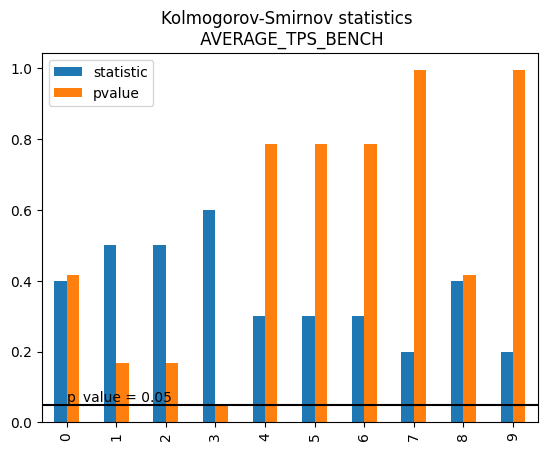

In [ ]:
df_k2 = pd.DataFrame(ks_2samp_list)
df_epps = pd.DataFrame(epps_2samp_list)


df_k2.plot(kind = "bar",title = "Kolmogorov-Smirnov statistics \n AVERAGE_TPS_BENCH")
plt.hlines(0.05, xmin = -1, xmax = 10, color = 'black')
plt.text(0, 0.06, "p_value = 0.05")

In [ ]:
df_epps.pvalue

0    0.506910
1    0.490531
2    0.229756
3    0.018513
4    0.475910
5    0.568743
6    0.473532
7    0.490944
8    0.480866
9    0.839403
Name: pvalue, dtype: float64

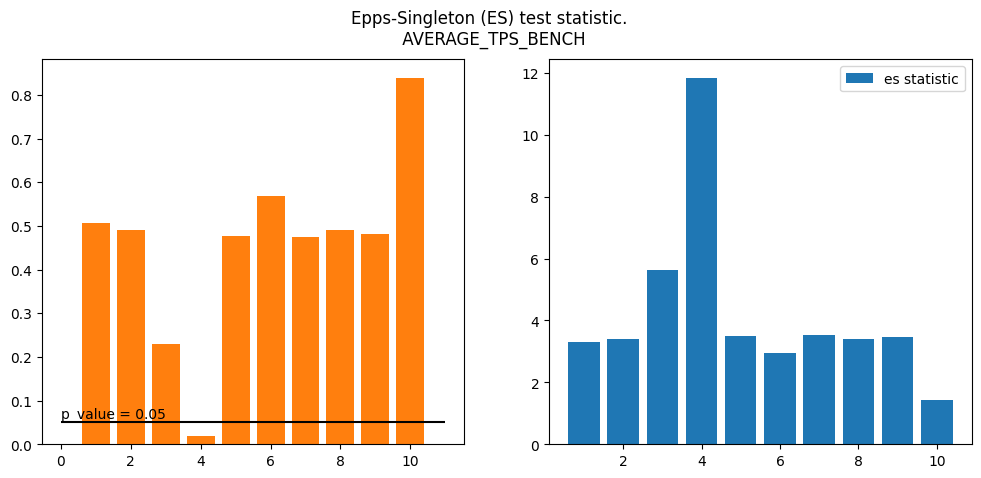

In [ ]:
fig, axx = plt.subplots(1,2, figsize = (12,5))

plt.suptitle("Epps-Singleton (ES) test statistic. \n AVERAGE_TPS_BENCH")
axx[0].bar(range(1,11), df_epps.pvalue, label = "pvalue", color = "#ff7f0e")
axx[0].hlines(0.05, xmin = 0, xmax = 11, color = 'black')
axx[0].text(0, 0.06, "p_value = 0.05")
axx[1].bar(range(1,11), df_epps.statistic, label = "es statistic")
plt.legend()

# SLHC desigh 4 variance

In [ ]:
fpath1 = "data/out_slhc_design_for_variance.csv"
df1 = pd.read_csv(fpath1)
df1

,ITER,NUM_THREADS,TICKS_PER_SLOT,RECV_BATCH_MAX_CPU,ITER_BATCH_SIZE,HASHES_PER_SECOND,TICKS_PER_SECOND,AVERAGE_TPS_BENCH1,AVERAGE_DROPRATE_BENCH1,REAL_TIME_RATE_BENCH1,USER_TIME_RATE_BENCH1,SYS_TIME_RATE_BENCH1
0,0,3.0,60.0,950.0,1017.0,1900000.0,168.0,27.528220,0.0,59638,448,626
1,1,3.0,60.0,950.0,1017.0,1900000.0,168.0,30.847692,0.0,59108,477,631
2,2,3.0,60.0,950.0,1017.0,1900000.0,168.0,29.576094,0.0,59507,416,679
3,3,3.0,60.0,950.0,1017.0,1900000.0,168.0,25.955353,0.0,59806,428,635
4,4,3.0,60.0,950.0,1017.0,1900000.0,168.0,33.158000,0.0,58316,425,588
...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,5.0,66.0,1050.0,983.0,2100000.0,152.0,26.684143,0.0,60038,437,629
96,6,5.0,66.0,1050.0,983.0,2100000.0,152.0,27.615225,0.0,59935,422,665
97,7,5.0,66.0,1050.0,983.0,2100000.0,152.0,27.173769,0.0,60156,437,614
98,8,5.0,66.0,1050.0,983.0,2100000.0,152.0,26.823427,0.0,60644,465,654


In [ ]:
av_tps_bench1_list = []

for i in range(10):
    df1_exp = df1[i*10:(i+1)*10]
    av_tps_bench1_list.append(df1_exp["AVERAGE_TPS_BENCH1"].values)

In [ ]:
import numpy as np

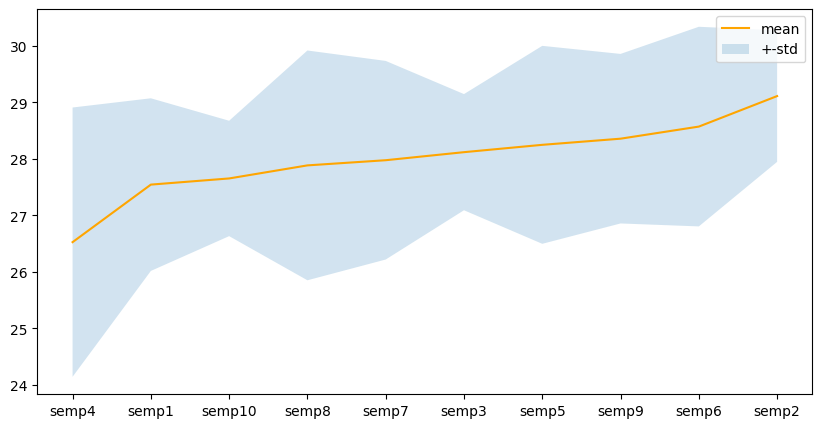

In [ ]:
atb1_df  = pd.DataFrame(av_tps_bench1_list, columns = ["semp{}".format(i+1) for i in range(10)])

atb1_stat_df = pd.DataFrame({"mean":atb1_df.mean(), "std":atb1_df.std()}).sort_values(by="mean")


plt.figure(figsize = (10,5))
plt.plot(atb1_stat_df["mean"], label = "mean", color = "orange")
plt.fill_between(atb1_stat_df.index, 
                 y1 =atb1_stat_df["mean"] + atb1_stat_df["std"],
                y2 = atb1_stat_df["mean"] - atb1_stat_df["std"],
                alpha = 0.2, label = "+-std")
plt.legend()

In [ ]:
am_av = atb1_stat_df["mean"].values
amn_av = am_av.mean()
VAR_EXP = ((am_av - amn_av)**2).mean()
EXP_VAR = ((atb1_df - am_av)**2).mean(0).mean()
SNR = VAR_EXP/EXP_VAR
SNR

0.13077208534498672

# Baseline: GB, GP, SVR

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
try:
    import optuna
except ModuleNotFoundError:
    !pip install optuna -q
    import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
def load_data():
    df50_train = pd.read_csv("data/out_slhc_design_train_50.csv")
    df100_train = pd.read_csv("data/out_slhc_design_train_100.csv")
    df200_train = pd.read_csv("data/out_slhc_design_train_200.csv")
    df100_test = pd.read_csv("data/out_slhc_design_test_100.csv")

    display(df50_train.head(3))
    display(df100_test.head(3))

    X_tr50 = df50_train.iloc[:,:6]
    y_tr50 = df50_train.iloc[:,6]
    X_tr100 = df100_train.iloc[:,:6]
    y_tr100 = df100_train.iloc[:,6]
    X_tr200 = df200_train.iloc[:,:6]
    y_tr200 = df200_train.iloc[:,6]
    X_tt100 = df100_test.iloc[:,:6]
    y_tt100 = df100_test.iloc[:,6]

    data50 = dict(train = {"X":X_tr50,"y":y_tr50}, test = {"X":X_tt100,"y":y_tt100})
    data100 = dict(train = {"X":X_tr100,"y":y_tr100}, test = {"X":X_tt100,"y":y_tt100})
    data200 = dict(train = {"X":X_tr200,"y":y_tr200}, test = {"X":X_tt100,"y":y_tt100})
    return data50, data100, data200
data50, data100, data200 = load_data()

,NUM_THREADS,TICKS_PER_SLOT,RECV_BATCH_MAX_CPU,ITER_BATCH_SIZE,HASHES_PER_SECOND,TICKS_PER_SECOND,AVERAGE_TPS_BENCH1,AVERAGE_DROPRATE_BENCH1,REAL_TIME_RATE_BENCH1,USER_TIME_RATE_BENCH1,SYS_TIME_RATE_BENCH1
0,3.0,54.0,971.0,1144.0,1863636.0,170.0,27.549847,0.0,60509,440,608
1,3.0,55.0,1114.0,853.0,2269697.0,169.0,28.256073,0.0,60925,431,565
2,3.0,64.0,1144.0,1005.0,1930303.0,159.0,27.595840,0.0,60040,447,578


,NUM_THREADS,TICKS_PER_SLOT,RECV_BATCH_MAX_CPU,ITER_BATCH_SIZE,HASHES_PER_SECOND,TICKS_PER_SECOND,AVERAGE_TPS_BENCH1,AVERAGE_DROPRATE_BENCH1,REAL_TIME_RATE_BENCH1,USER_TIME_RATE_BENCH1,SYS_TIME_RATE_BENCH1
0,3.0,65.0,974.0,1123.0,2033333.0,146.0,27.570316,0.0,59834,418,672
1,3.0,59.0,911.0,935.0,1930303.0,142.0,27.335081,0.0,61926,506,659
2,3.0,71.0,892.0,1114.0,1706061.0,165.0,27.530470,0.0,59923,529,664


In [ ]:
gbr = GradientBoostingRegressor()

def calc_crossval_scores(model, X, y):
    mse_cv = -cross_val_score(estimator=model,X=X,y=y,cv=5,scoring="neg_mean_squared_error" ).mean()
    rmse_cv = -cross_val_score(estimator=model,X=X,y=y,cv=5,scoring="neg_root_mean_squared_error" ).mean()
    return mse_cv, rmse_cv

def create_gbr(trial):

    n_estimators = trial.suggest_int('n_estimators', 50, 1000)
    max_depth = trial.suggest_int('max_depth', 1, 20)
    lr = trial.suggest_float('learning_rate', 0.01, 0.9) 
    loss = trial.suggest_categorical('loss', ['squared_error', 'absolute_error'])
    model = GradientBoostingRegressor(n_estimators = n_estimators, max_depth=max_depth, learning_rate = lr, loss=loss)
    
    if trial.should_prune():
            raise optuna.TrialPruned()
            
    return model


def create_svr(trial):

    C= trial.suggest_float('C', 0.1, 1.0)
    gamma = trial.suggest_categorical("gamma", ["scale", "auto"]) 
    kernel = trial.suggest_categorical('kernel', ["rbf","sigmoid"])
    model = SVR(kernel=kernel, gamma=gamma, C=C)
    
    if trial.should_prune():
            raise optuna.TrialPruned()
            
    return model

def create_gpr(trial):
    
    constant_value = trial.suggest_float("constant_value", 0 , 10)
    length_scale = trial.suggest_float("length_scale", 0 , 20)
    noise_level = trial.suggest_float("noise_level", 0, 10)
    
    kernel = (ConstantKernel(constant_value=constant_value) +
    ConstantKernel(constant_value=constant_value) * RBF(length_scale=length_scale, length_scale_bounds=(1e-010, 100000.0)) + 
    WhiteKernel(noise_level=noise_level)
             )

    model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=2)
    
    if trial.should_prune():
            raise optuna.TrialPruned()
            
    return model


def objective(trial, model_type: str, data):
    if model_type == "gbr":
        model = create_gbr(trial)
    elif model_type == "svr":
        model = create_svr(trial)
    elif model_type=="gpr":
        model = create_gpr(trial)
        
    neg_rmse_gbr_cv = cross_val_score(estimator=model,X=data["train"]["X"],y=data["train"]["y"],
                                      cv=5,scoring="neg_root_mean_squared_error").mean()
    return neg_rmse_gbr_cv

def optimize(model_type, data, n_trials=2):
    study = optuna.create_study(direction='maximize', study_name=f"{model_type}_opt")
    study.optimize(lambda trial: objective(trial,model_type, data), n_trials=n_trials)
    return study.best_params
    
    
def best_fit(model_type, data, best_params):
    if model_type == "gbr":
        best_model = GradientBoostingRegressor(**best_params)
    elif model_type=="svr":
        best_model = SVR(**best_params)
    elif model_type=="gpr":
        kernel = (ConstantKernel(constant_value=best_params["constant_value"]) +
        ConstantKernel(constant_value=best_params["constant_value"])*
        RBF(length_scale=best_params["length_scale"],  length_scale_bounds=(1e-010, 100000.0)) + WhiteKernel(noise_level=best_params["noise_level"])
                 )
        best_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=2)
        
    mse_best , rmse_best = calc_crossval_scores(best_model, data['train']["X"],data['train']["y"])
    print(f"Best {model_type} MSE (train): {mse_best}, RMSE: {rmse_best}")

    mse_best , rmse_best = calc_crossval_scores(best_model, data['test']["X"],data['test']["y"])
    print(f"Best {model_type} MSE (test): {mse_best}, RMSE: {rmse_best} \n")
        
    

In [ ]:
# model_type="svr"
# n_trials=20
# best_fit(model_type, data50,  best_params= optimize(model_type, data50, n_trials=n_trials))
# best_fit(model_type, data100,  best_params= optimize(model_type, data100, n_trials=n_trials))
# best_fit(model_type, data200,  best_params= optimize(model_type, data200, n_trials=n_trials))

In [ ]:
# model_type="gbr"
# n_trials=20
# best_fit(model_type, data50,  best_params= optimize(model_type, data50, n_trials=n_trials))
# best_fit(model_type, data100,  best_params= optimize(model_type, data100, n_trials=n_trials))
# best_fit(model_type, data200,  best_params= optimize(model_type, data200, n_trials=n_trials))

In [ ]:
# model_type="gpr"
# n_trials=20
# best_fit(model_type, data50,  best_params= optimize(model_type, data50, n_trials=n_trials))
# best_fit(model_type, data100,  best_params= optimize(model_type, data100, n_trials=n_trials))
# best_fit(model_type, data200,  best_params= optimize(model_type, data200, n_trials=n_trials))

In [ ]:
# import torch
# import gpytorch
# from gpytorch.means import ConstantMean
# from gpytorch.kernels import RBFKernel
# from gpytorch.likelihoods import GaussianLikelihood

# # Initialize GP model and likelihood
# class ExactGPModel(gpytorch.models.ExactGP):
#     def __init__(self, train_x, train_y, likelihood):
#         super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
#         self.mean_module = ConstantMean()
#         self.covar_module = RBFKernel()

#     def forward(self, x):
#         mean_x = self.mean_module(x)
#         covar_x = self.covar_module(x)
#         return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)
# # Generate synthetic data
# train_X = torch.linspace(0, 1, 10).unsqueeze(-1)
# train_Y = torch.sin(train_X * (2 * 3.1416)) + 0.1 * torch.randn_like(train_X)
# likelihood = GaussianLikelihood()
# model = ExactGPModel(train_X, train_Y, likelihood)
# mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

# # Set up optimizer
# optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
# for i in range(50):
#     optimizer.zero_grad()
#     output = model(train_X)
#     loss = -mll(output, train_Y).mean() 
#     loss.backward()
#     optimizer.step()
#     output_mean = output.mean
#     output_variance = output.variance
    
#     print("Iteration {}: Mean={}, Variance={}".format(i+1, output_mean, output_variance))

# # After optimization, get optimized parameters
# print("Optimized Likelihood Noise Level:", likelihood.noise.item())

In [ ]:
# with torch.no_grad():
# #     model.eval()
# #     likelihood.eval()
#     test_X = train_X
#     print(test_X.shape)
#     observed_pred = likelihood(model(test_X))
#     lower, upper = observed_pred.confidence_region()

In [ ]:
# observed_pred.mean

In [ ]:
# import torch
# import gpytorch
# import matplotlib.pyplot as plt

# # Define your training data (train_X, train_Y) and initialize your GP model and likelihood
# # Plot initial model fit
# with torch.no_grad():
# #     model.eval()
# #     likelihood.eval()
#     test_X = torch.linspace(0, 1, 10).unsqueeze(-1)
#     print(test_X.shape)
#     observed_pred = model(test_X)
#     lower, upper = observed_pred.confidence_region()
    
#     plt.figure(figsize=(12, 6))
#     plt.scatter(train_X.numpy(), train_Y.numpy(), color='red', label='Training Data')
#     plt.plot(test_X.numpy(), observed_pred.mean.detach().numpy(), 'b', label='Initial Model Fit')
# #     plt.fill_between(test_X.numpy(), lower.detach().numpy(), upper.detach().numpy(), alpha=0.5)
#     plt.legend()
#     plt.title('Initial Model Fit')
#     plt.show()

# # Optimization loop
# for i in range(10):
#     optimizer.zero_grad()
#     output = model(train_X)
#     loss = -mll(output, train_Y).mean()  # Calculate mean of the loss tensor
#     loss.backward()
#     optimizer.step()

#     # Plot updated model fit after each iteration
#     with torch.no_grad():
# #         model.eval()
# #         likelihood.eval()
#         observed_pred = likelihood(model(test_X))
#         lower, upper = observed_pred.confidence_region()

#         plt.figure(figsize=(12, 6))
#         plt.scatter(train_X.numpy(), train_Y.numpy(), color='red', label='Training Data')
#         plt.plot(test_X.numpy(), observed_pred.mean.detach().numpy(), 'b', label=f'Iteration {i+1}')
# #         plt.fill_between(test_X.numpy(), lower.detach().numpy(), upper.detach().numpy(), alpha=0.5)
#         plt.legend()
#         plt.title(f'Iteration {i+1}')
#         plt.show()

# # Plot final model fit
# with torch.no_grad():
# #     model.eval()
# #     likelihood.eval()
#     observed_pred = likelihood(model(test_X))
#     lower, upper = observed_pred.confidence_region()

#     plt.figure(figsize=(12, 6))
#     plt.scatter(train_X.numpy(), train_Y.numpy(), color='red', label='Training Data')
#     plt.plot(test_X.numpy(), observed_pred.mean.detach().numpy(), 'b', label='Final Model Fit')
# #     plt.fill_between(test_X.numpy(), lower.detach().numpy(), upper.detach().numpy(), alpha=0.5)
#     plt.legend()
#     plt.title('Final Model Fit')
#     plt.show()

# Baesian optimization

In [ ]:
try: 
    import gpytorch
except:
    %pip install gpytorch botorch -q
import random
import gpytorch
import botorch
import torch
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.constraints import Interval
from botorch.models import SingleTaskGP
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.fit import fit_gpytorch_mll
from botorch.acquisition import UpperConfidenceBound, ExpectedImprovement
from botorch.optim import optimize_acqf
from sklearn.preprocessing import MinMaxScaler


def gaussian_noise(y):
    return random.gauss(0, 0.02*y)

In [ ]:
scaler = MinMaxScaler()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype = torch.double

X = torch.tensor(scaler.fit_transform(data50["train"]["X"].values))
y = torch.tensor(data50["train"]["y"]).unsqueeze(-1)

model_local = SingleTaskGP(X, y)
mll = ExactMarginalLogLikelihood(model_local.likelihood, model_local)
fit_gpytorch_mll(mll)

model_fix = SVR(**optimize("svr", data50, n_trials=20))
model_fix.fit(data50["train"]["X"], data50["train"]["y"])

/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/botorch/models/utils/assorted.py:202: InputDataWarning: Input data is not standardized (mean = tensor([27.9485], dtype=torch.float64), std = tensor([2.0823], dtype=torch.float64)). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)


SVR(C=0.7994760104546109, gamma='auto')

## UCB AF

In [ ]:
# UCB = UpperConfidenceBound(model_local, beta=0.1)
# #Optimizing acquisiton function
# lb = torch.Tensor([3, 850, 850, 53, 1700000, 136])
# rb = torch.Tensor([5, 1150, 1150, 73, 2300000, 184])

# bounds = torch.stack([lb, rb])
# candidate, acq_value = optimize_acqf(
#         UCB, bounds=bounds, q=1, num_restarts=5, raw_samples=100,
#     )

# X_opt_ucb = scaler.inverse_transform(candidate)
# Y_opt_ucb = acq_value
# Y_bb_ucb = model_fix.predict(X_opt_ucb)
# print(X_opt_ucb)
# print(f"Our optimisation result {Y_opt_ucb}")
# print(f"Our blackbox result {Y_bb_ucb}") #our blackbox
# print(f"Initial max result {y.max()}")

## Expected Improvement AF

In [ ]:
# EI = ExpectedImprovement(model_local, best_f=0.5, maximize = True)

# candidate, acq_value = optimize_acqf(
#         EI, bounds=bounds, q=1, num_restarts=5, raw_samples=100,
#     )

# X_opt_ei = scaler.inverse_transform(candidate)
# Y_opt_ei = acq_value
# Y_bb_ei = model_fix.predict(X_opt_ei)
# print(X_opt_ei)
# print(f"Our optimisation result {Y_opt_ei}")
# print(f"Our blackbox result {Y_bb_ei}") #our blackbox
# print(f"Initial max result {y.max()}")

In [ ]:
# help(UpperConfidenceBound)

In [ ]:
import numpy as np
try:
    import pySOT
except:
    !pip install pySOT -q
import numpy as np
from pySOT.strategy import DYCORSStrategy
from pySOT.auxiliary_problems import candidate_dycors
from pySOT.surrogate import gp
from pySOT.optimization_problems import OptimizationProblem, Hartmann3
from pySOT.experimental_design import SymmetricLatinHypercube
from poap.controller import ThreadController, SerialController

In [ ]:
# Define the objective function
class Optim(OptimizationProblem):

    def __init__(self, dim=2, lower_bounds=None, upper_bounds=None):
        self.dim = dim
        self.lb = lower_bounds
        self.ub = upper_bounds
        self.int_var = np.array([])
        self.cont_var = np.arange(0, dim)
        self.info = str(dim) + "-dimensional black box"

    def eval(self, x):
        return x#(x[0] - 2) ** 2 + (x[1] + 3) ** 2

# Define the search space
lower_bounds = np.zeros(3)
upper_bounds = np.ones(3)


# Create an instance of the Optim class
optim = Hartmann3()#Optim(2, lower_bounds, upper_bounds)

# Create the GP surrogate model
surrogate = gp.GPRegressor(3, lower_bounds, upper_bounds)

# Create the experimental design
max_evals = 100
input_dimensionality=3
slhd = SymmetricLatinHypercube(dim=input_dimensionality,num_pts=max_evals-1)

# Create the DYCORSStrategy optimizer
strategy = DYCORSStrategy(max_evals=max_evals, opt_prob=optim, exp_design=slhd, 
                          surrogate=surrogate,
                         batch_size=1)
# optimizer.generate_evals(num_pts=10)

controller = SerialController(objective=optim.eval)
controller.strategy = strategy
controller.run()
results_serial = np.array([o.value for o in controller.fevals if o.value is not None])
results_serial.min()

/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/pySOT/strategy/dycors_strategy.py:89: RuntimeWarning: invalid value encountered in scalar divide
  prob_perturb = min([20.0 / self.opt_prob.dim, 1.0]) * (1.0 - (np.log(num_evals) / np.log(budget)))


/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


-3.4443586319536177

In [ ]:
results_serial

array([-4.74925741e-01, -1.35160911e-01, -1.67170282e-03, -1.62568102e-02,
       -9.69139705e-01, -1.86436748e+00, -3.88588082e-01, -3.02842881e-01,
       -3.31177660e-01, -1.63602717e-02, -2.66277672e+00, -2.81963293e-03,
       -4.29262664e-01, -1.08551611e+00, -4.55507072e-03, -7.10783374e-01,
       -2.33394801e-01, -1.84207357e-01, -1.03552539e-01, -2.34729807e-01,
       -7.07331907e-01, -8.61348565e-01, -1.51722913e+00, -1.72188803e-01,
       -6.41131659e-01, -1.23713525e-01, -5.99874399e-01, -6.73558477e-01,
       -2.13214246e-01, -2.53034348e+00, -4.66625940e-01, -3.58741843e-01,
       -1.20970073e+00, -3.44435863e+00, -4.74292419e-01, -3.58320458e-01,
       -2.39560856e+00, -9.44530360e-01, -1.95947547e+00, -2.32739219e+00,
       -2.09158717e-03, -1.66238818e+00, -1.35319669e+00, -5.91883303e-01,
       -1.41099595e-01, -4.59036133e-01, -3.84130051e-01, -1.26673126e+00,
       -1.80086493e-01, -6.28022015e-01, -2.28844593e+00, -3.61783802e-01,
       -2.01724397e+00, -

In [ ]:
# lb = np.array([3, 850, 850, 53, 1700000, 136])
# rb = np.array([5, 1150, 1150, 73, 2300000, 184])
# reg = gp.GPRegressor(6, lb, rb)
# reg._X = data50["train"]["X"].values
# reg.fX =  data50["train"]["y"].values
# reg.predict(xx[10])

In [ ]:
best_params = optimize("gpr", data100, n_trials=2)
kernel = (ConstantKernel(constant_value=best_params["constant_value"]) +
    ConstantKernel(constant_value=best_params["constant_value"])*
    RBF(length_scale=best_params["length_scale"],  length_scale_bounds=(1e-010, 100000.0)) + WhiteKernel(noise_level=best_params["noise_level"])
            )
model_fix = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=2)
model_fix.fit(X,y)


GaussianProcessRegressor(kernel=2.63**2 + 2.63**2 * RBF(length_scale=3) + WhiteKernel(noise_level=5.91),
                         n_restarts_optimizer=2)

In [ ]:
x = torch.tensor([4.000000e+00, 8.830000e+02, 8.500000e+02, 6.000000e+01, 2.233333e+06,
 1.790000e+02])

In [ ]:
model_local.posterior(x.reshape(1,-1)).mean.item()

28.051903290242326

In [ ]:
model_fix.predict(x.reshape(1,-1))[0]

27.946995325652324

In [ ]:
import warnings 
warnings.simplefilter('ignore')
from pySOT.surrogate import RBFInterpolant, CubicKernel, LinearTail
# Define the objective function
max_evals = 20
input_dimensionality=6


class Optim(OptimizationProblem):

    def __init__(self, dim=6, lower_bounds=None, upper_bounds=None):
        self.dim = dim
        self.lb = lower_bounds
        self.ub = upper_bounds
        self.int_var = np.arange(0, dim) 
        self.cont_var = np.array([])
        self.info = str(dim) + "-dimensional black box"

    def eval(self, x):
        # print(x)
        x=torch.tensor(x)
        return model_local.posterior(x.reshape(1,-1)).mean.item() #model_fix.predict(x.reshape(1,-1))[0]

# Define the search space
lower_bounds = np.array([3, 850, 850, 53, 1700000, 136])
upper_bounds = np.array([5, 1150, 1150, 73, 2300000, 184])


# Create an instance of the Optim class
optim = Optim(6, lower_bounds, upper_bounds)
surrogate = gp.GPRegressor(6, lower_bounds, upper_bounds)
# Create the GP surrogate model
# surrogate = RBFInterpolant(
#     dim=input_dimensionality, lb=lower_bounds, ub=upper_bounds, kernel=CubicKernel(), tail=LinearTail(input_dimensionality))

# surrogate._X = data50["train"]["X"].values
# surrogate.fX =  data50["train"]["y"].values

# Create the experimental design

slhd = SymmetricLatinHypercube(dim=input_dimensionality,num_pts=12)

# Create the DYCORSStrategy optimizer
strategy = DYCORSStrategy(max_evals=max_evals, opt_prob=optim, exp_design=slhd, 
                          surrogate=surrogate,
                         batch_size=1)
# optimizer.generate_evals(num_pts=10)

controller = SerialController(objective=optim.eval)
controller.strategy = strategy
controller.run()
results_serial = np.array([o.value for o in controller.fevals if o.value is not None])
results_serial.max(), results_serial

NameError: name 'OptimizationProblem' is not defined

In [ ]:
X

In [ ]:


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype = torch.double

X = torch.tensor(scaler.fit_transform(data50["train"]["X"].values))
y = torch.tensor(data50["train"]["y"]).unsqueeze(-1)

model_local = SingleTaskGP(X, y)
mll = ExactMarginalLogLikelihood(model_local.likelihood, model_local)
fit_gpytorch_mll(mll)

model_fix = SVR(**optimize("svr", data50, n_trials=20))
model_fix.fit(data50["train"]["X"], data50["train"]["y"])

EI = ExpectedImprovement(model_local, best_f=0.5, maximize = True)

candidate, acq_value = optimize_acqf(
        EI, bounds=bounds, q=1, num_restarts=5, raw_samples=100,
    )

X_opt_ei = scaler.inverse_transform(candidate)
Y_opt_ei = acq_value
Y_bb_ei = model_fix.predict(X_opt_ei)
print(X_opt_ei)
print(f"Our optimisation result {Y_opt_ei}")
print(f"Our blackbox result {Y_bb_ei}") #our blackbox
print(f"Initial max result {y.max()}")

class BotorchOptimizer():
    def __init__(self,  lower_bound:np.array, upper_bound: np.array, num_candidates=1, num_restarts = 5, raw_samples = 100):
        self.num_candidates=num_candidates
        self.num_restarts=num_restarts
        self.raw_samples=raw_samples
        self.beta = beta
        
        self.bounds = torch.stack([lb, rb])
    
    def train_surrogate(self, X: pd.DataFrame, y: np.array, is_scaler = True):
        """ """
        self.is_scaler = is_scaler
        if is_scaler:
            scaler = MinMaxScaler()
            X = scaler.fit_transform(X.values)
        X = torch.tensor(X)
        y = torch.tensor(y).unsqueeze(-1)
        model_local = SingleTaskGP(X, y)
        mll = ExactMarginalLogLikelihood(model_local.likelihood, model_local)
        fit_gpytorch_mll(mll)    
        
        return model_local
    
    def optimize_UCB(X: pd.DataFrame, y: np.array,beta =0.1):
        model_local = train_surrogate(X, y)
        UCB = UpperConfidenceBound(model_local, beta=beta, maximize=True)
        candidate, acq_value = optimize_acqf(
        UCB, bounds=self.bounds, self.num_candidates, self.num_restarts, self.raw_samples,
        )
        if train_surrogate.is_scaler:
            candidate = scaler.inverse_transform(candidate)
        
        return candidate, acq_value
        
        
    def optimize_EI(X: pd.DataFrame, y: np.array,best_f =0.5):
        model_local = train_surrogate(X, y)
        EI = ExpectedImprovement(model_local, best_f=best_f, maximize = True)
        candidate, acq_value = optimize_acqf(
        EI, bounds=self.bounds, self.num_candidates, self.num_restarts, self.raw_samples,
        )
        if train_surrogate.is_scaler:
            candidate = scaler.inverse_transform(candidate)
        
        return candidate, acq_value
    



In [6]:
import random
import gpytorch
import botorch
import torch
import pandas as pd
import warnings 
warnings.simplefilter('ignore')
import os
from botorch.models import SingleTaskGP
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.fit import fit_gpytorch_mll
from botorch.acquisition import UpperConfidenceBound, ExpectedImprovement
from botorch.optim import optimize_acqf
from sklearn.preprocessing import MinMaxScaler
from botorch.utils.sampling import draw_sobol_samples


from botorch.generation import MaxPosteriorSampling
import numpy as np
from pySOT.strategy import DYCORSStrategy
from pySOT.surrogate import gp
from pySOT.optimization_problems import OptimizationProblem
from pySOT.experimental_design import SymmetricLatinHypercube
from poap.controller import SerialController

DTYPE = torch.double
DEVICE = torch.device("cpu")

class DYCORSOptimProblem(OptimizationProblem):

    def __init__(self, X, y, dim=6, lower_bounds=None, upper_bounds=None):
        self.best_x = []
        self.dim = dim
        self.lb = lower_bounds
        self.ub = upper_bounds
        self.int_var = np.arange(0, dim) 
        self.cont_var = np.array([])
        self.info = str(dim) + "-dimensional black box"

        self.X = X
        self.y=y

    def train_surrogate(self, X, y):
        surrogate = gp.GPRegressor(6, self.lb, self.ub)
        surrogate.updated = False
        surrogate._X = X
        surrogate.fX =  y
        surrogate._fit()
        return surrogate
        
    def eval(self, x):
        self.best_x.append(x.astype(int))
        surrogate = self.train_surrogate(self.X, self.y)
        return surrogate.predict(x)[0]

class BayesianOptimizer(): 
    """ Implements 4 Bayesian optimization strategies: UCB, Expected Improvement, Thompson sampling and DYCORS"""
    def __init__(self, lower_bound:np.array, upper_bound: np.array, num_candidates=1,
                  num_restarts = 5, raw_samples = 100, is_scaler = False): 
        """ Initializes global atributes.

        Parameters
        ----------
        lower_bound : np.array
            Lower bound for X candidates search.
        upper_bound : np.array
            Upper bound for X candidates search.
        num_candidates : int, optional
            Num candiadates outputed by optimizers, by default 1
        num_restarts : int, optional
            Num restarts for EI and UCB, by default 5
        raw_samples : int, optional
            Num raw samples for EI and UCB, by default 100
        is_scaler : bool, optional
            Use MinMaxScaler, by default False
        """        
        self.num_candidates=num_candidates 
        self.num_restarts=num_restarts 
        self.raw_samples=raw_samples 
        self.lb = lower_bound
        self.ub = upper_bound
        if is_scaler:
            self.scaler = MinMaxScaler() 
        else:
            self.scaler = None
         
        self.bounds = torch.stack([torch.tensor(lower_bound,dtype=torch.float64), torch.tensor(upper_bound,dtype=torch.float64)]) 
     
    def train_botorch_surrogate(self, X: np.array, y: np.array): 
        """ Trains SingleTaskGP botorch surrogate model.

        Parameters
        ----------
        X : np.array
            Feature values.
        y : np.array
            Target values.

        Returns
        -------
        
            Trained surrogate model.
        """         
        if self.scaler is not None: 
            X = self.scaler.fit_transform(X) 
        X = torch.tensor(X) 
        y = torch.tensor(y)
        model_local = SingleTaskGP(X, y) 
        mll = ExactMarginalLogLikelihood(model_local.likelihood, model_local) 
        fit_gpytorch_mll(mll)  
        return model_local 

     
    def optimize_UCB(self, X: np.array, y: np.array,beta =0.1):
        """ """
        model_local = self.train_botorch_surrogate(X, y) 
        UCB = UpperConfidenceBound(model_local, beta=beta, maximize=True) 
        candidate, acq_value = optimize_acqf( 
        UCB,self.bounds, self.num_candidates, self.num_restarts, self.raw_samples
        ) 

        candidate = np.array(candidate)
         
        return candidate[0].astype(int)
         
         
    def optimize_EI(self, X: np.array, y: np.array,best_f =0.5): 
        """ """
        model_local = self.train_botorch_surrogate(X, y) 
        EI = ExpectedImprovement(model_local, best_f=best_f, maximize = True) 
        candidate, acq_value = optimize_acqf( 
        EI, self.bounds, self.num_candidates, self.num_restarts, self.raw_samples, 
        ) 
        candidate = np.array(candidate)
         
        return candidate[0].astype(int)
    
    def optimize_TS(self, X: np.array, y: np.array):
        """ """
        X_cand = draw_sobol_samples(self.bounds,1,1)[0]
        model_local = self.train_botorch_surrogate(X, y) 
        thompson_sampling = MaxPosteriorSampling(model=model_local, replacement=True)
        candidate = thompson_sampling(X_cand, num_samples=self.num_candidates)

        candidate = np.array(candidate)
         
        return candidate[0].astype(int)
    
    def optimize_DYCORS(self, X: np.array, y: np.array):
        """ """
        input_dimensionality = X.shape[1]
        optim = DYCORSOptimProblem(X, y,input_dimensionality, self.lb, self.ub)
        surrogate = gp.GPRegressor(input_dimensionality,  self.lb, self.ub)
        
        slhd = SymmetricLatinHypercube(dim=input_dimensionality,num_pts=2*input_dimensionality+1)

        # Create the DYCORSStrategy optimizer
        strategy = DYCORSStrategy(max_evals=self.num_candidates, opt_prob=optim, exp_design=slhd, 
                                surrogate=surrogate,
                                batch_size=1)

        controller = SerialController(objective=optim.eval)
        controller.strategy = strategy
        controller.run()
    

        return optim.best_x[0]
            
if __name__ == "__main__":
    # feature columns
    feature_cols = ['NUM_THREADS', 'TICKS_PER_SLOT', 'RECV_BATCH_MAX_CPU',
        'ITER_BATCH_SIZE', 'HASHES_PER_SECOND', 'TICKS_PER_SECOND']
    # y column
    target_col = ["AVERAGE_TPS_BENCH1"]
    # inital dataset for training
    df100_train = pd.read_csv("data/out_slhc_design_train_50.csv")

    #initial X, y for trainig
    X = df100_train[feature_cols].values
    y = df100_train[target_col].values

    # lower and upper bound for X candidates seacrh
    lb = np.array([3, 53, 850, 850 , 1700000, 136])
    ub = np.array([5, 73, 1150, 1150 , 2300000, 184])

    botorch_optim = BayesianOptimizer(lower_bound=lb, upper_bound=ub,is_scaler=True)
    print("UCB candidate {}:\nExpected Improvement cnadidate: {}\nTompson Sampling candidate: {}\nDYCORS candidate: {}".format(
        botorch_optim.optimize_UCB(X, y),
        botorch_optim.optimize_EI(X, y),
        botorch_optim.optimize_TS(X, y),
        botorch_optim.optimize_DYCORS(X, y),

        )
    )

UCB candidate [      4    1147     899      63 2061186     154]:
Expected Improvement cnadidate: [      3     852    1103      57 1926111     146]
Tompson Sampling candidate: [      3    1038    1096      65 1772279     142]
DYCORS candidate: [      5    1125    1150      68 2150000     184]


In [68]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from botorch.models import SingleTaskGP, ModelListGP
from gpytorch.mlls.sum_marginal_log_likelihood import SumMarginalLogLikelihood
from botorch import fit_gpytorch_model
from botorch.optim.optimize import optimize_acqf_list
from botorch.utils.transforms import unnormalize, normalize
from botorch.acquisition.monte_carlo import qNoisyExpectedImprovement
from botorch.utils.sampling import sample_simplex
from botorch.acquisition.objective import GenericMCObjective
from botorch.utils.multi_objective.scalarization import get_chebyshev_scalarization
from botorch.sampling import SobolQMCNormalSampler


standard_bounds = torch.tensor([[0.0], [1.0]])
NUM_RESTARTS =  5
RAW_SAMPLES = 100
MC_SAMPLES = 256

def initialize_model(train_x, train_y):
    
    train_x = normalize(train_x, standard_bounds)
    model = SingleTaskGP(train_x, train_y)
    mll = ExactMarginalLogLikelihood(model.likelihood, model)
    return mll, model

def generate_next_candidate(x, y, n_candidates=1):
    
    mll, model = initialize_model(x, y)
    fit_gpytorch_model(mll)

    # sampler = SobolQMCNormalSampler(num_samples=MC_SAMPLES)

    train_x = normalize(x, standard_bounds)
    with torch.no_grad():
        pred = model.posterior(normalize(train_x,standard_bounds)).mean
    
    acq_fun = ExpectedImprovement(
        model=model,
    )

    candidates, _ = optimize_acqf(
        acq_function=acq_fun,
        bounds=standard_bounds,
        num_restarts=NUM_RESTARTS,
        raw_samples=RAW_SAMPLES,
        # options={
        #     "batch_limit": 5,
        #     "maxiter": 200,
        # }
    )

    return unnormalize(candidates, standard_bounds)

bounds = torch.stack([torch.tensor(lb,dtype=torch.float64), torch.tensor(ub,dtype=torch.float64)]) 

In [90]:
lowb = Xt.min(dim=0).values
upb =  Xt.max(dim=0).values
bounds = torch.stack([lowb.type(torch.float64), upb.type(torch.float64)])
standard_bounds = torch.tensor([[0.0]*6, [1.0]*6])

In [203]:
Xt = torch.tensor(X)
yt = torch.tensor(y)

train_x = normalize(Xt, bounds)
mll, model = initialize_model(train_x, yt)
fit_gpytorch_model(mll)

acq_fun = ExpectedImprovement(
        model=model,
        best_f=0.5,
        maximize=True
    )
candidates, _ = optimize_acqf(
    acq_function=acq_fun,
    q=1,
    bounds=standard_bounds,
    num_restarts=NUM_RESTARTS,
    raw_samples=RAW_SAMPLES,
)
candidate = unnormalize(candidates, bounds)
candidate, model.posterior(normalize(candidate, bounds).reshape(1,-1)).mean, model.posterior(candidate.reshape(1,-1)).variance

(tensor([[4.9962e+00, 6.6750e+01, 9.6349e+02, 9.9891e+02, 1.7152e+06, 1.6178e+02]],
        dtype=torch.float64),
 tensor([[28.8736]], dtype=torch.float64, grad_fn=<UnsqueezeBackward0>),
 tensor([[3.8099]], dtype=torch.float64, grad_fn=<UnsqueezeBackward0>))

tensor([[3.0000e+00, 5.3000e+01, 8.5000e+02, 8.5000e+02, 1.7000e+06, 1.3600e+02],
        [5.0000e+00, 7.3000e+01, 1.1500e+03, 1.1500e+03, 2.3000e+06, 1.8400e+02]],
       dtype=torch.float64)

In [66]:
lowerb = train_x.min(dim=0).values
upperb =  train_x.max(dim=0).values
lowerb, upperb

(tensor([ 0.0000, -2.6567,  0.0000, 39.8500,  0.0000,  0.0000],
        dtype=torch.float64),
 tensor([ 1.0000, -2.5900,  1.0000, 54.8500,  1.0000,  1.0000],
        dtype=torch.float64))